# Predicting the Sale Price of Bulldozers using ML

In this  notebook, we're going to go through an example ML project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.
The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).


## 3. Evaluation

The evaluation metric for this competition is the **RMSLE (root mean squared log error)** between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most of regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a Machine Learning model which minimize RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset.


In [1]:
# Importing tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [2]:
# Import training and validation sets
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [3]:
# Information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

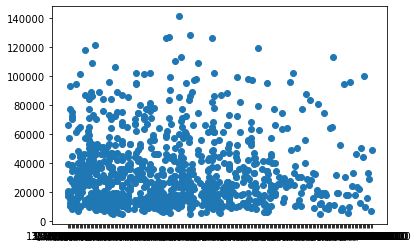

In [6]:
# Plotting saledate vs SalePrice
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

Se observa que no hay mucha coherencia en el gráfico, además, ¿Qué sucede con el Xlabel?

A continuación se nota el formato de tiempo:

In [7]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<AxesSubplot:ylabel='Frequency'>

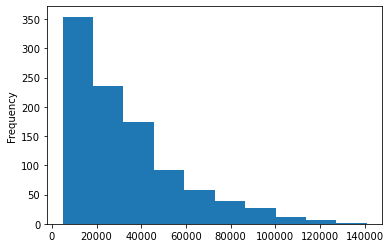

In [8]:
df.SalePrice[:1000].plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the 'parse_dates' parameter

In [9]:
# Import adta again but this time parse dates.
df = pd.read_csv("data/TrainAndValid.csv", 
                 low_memory=False,
                 parse_dates=["saledate"])

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate[:1000]

# El dtype <M8[ns] es igual que datetime64[ns]
# De esta forma se ordena mejor los valores por tiempo

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

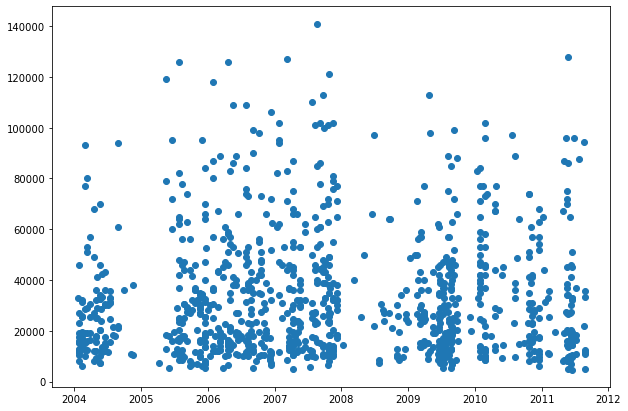

In [12]:
# Plotting with date type
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort Dataframe by 'saledate'

When working with time series data, it's a good idea to sort it by date.

In [14]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when manipulate the copu, we've still got our original data.

In [15]:
# Make a copy
df_tmp = df.copy()
df_tmp.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for 'saledate' column    (Feature Engineering)

From pandas datetime attributes (DatetimeIndex) we could access some attributes of the date.

Enrich dataframe

In [16]:
# 'dt' is for datetime
df_tmp.head().saledate.dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
Name: saledate, dtype: int64

In [17]:
# Adding some columns to our dataframe
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [18]:
df_tmp.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


In [19]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'
df_tmp.drop("saledate", axis=1, inplace=True)

In [20]:
# Check the values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [21]:
# let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor

# We're dealing with more than 400K samples
model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)

# Por ahora no haremos split, todo el archivo TrainAndValid.csv...
X  = df_tmp.drop("SalePrice", axis=1)
y = df_tmp["SalePrice"]

# Esto dará error ya que no toda la data está en formato numérico, 
# además tenemos muchos valores no asignados (NaN).
model.fit(X, y)

ValueError: could not convert string to float: 'Low'

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

Let's use 'pandas types api'

We can check the different datatypes compatible with pandas (data types related functionality) here:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [22]:
# Find the columns which contain strings 
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
# label = column name
# content = column content

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [23]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        # Set the Categorical to be ordered.
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [24]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [25]:
# Aquí se observa que se ordenó alfabéticamente las categorias
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

Aunque parezcan strings, las hemos transformado a 'category' y por ende, pandas trata estos datos como numéricos indirectamente. Podemos comprobarlo de la siguiente forma:

In [26]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories, we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [27]:
# Check missing data (there is a lot)
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data (to use it any moment)

This way, we have a checkpoint.

In [28]:
# Export current tmp dataframe
df_tmp.to_csv("data/train_tmp.csv", 
              index=False)

In [115]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv", 
                     low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## Fill missing values

### Fill numerical missing values first

In [116]:
# Check for which columns are numerical
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


**NOTA:** Esto lo añadi yo (splitting data)

In [144]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

Las siguientes dos celdas solo son para reordenar los index

In [145]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [146]:
# Check for wich numeric columns have null values
print("Missing values on train data:")
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label, "have " + str(pd.isnull(content).sum()) + " missing values")

print("\nMissing values on validation data:")
# Check for wich numeric columns have null values
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label, "have " + str(pd.isnull(content).sum()) + " missing values")

Missing values on train data:
auctioneerID have 20136 missing values
MachineHoursCurrentMeter have 258360 missing values

Missing values on validation data:
MachineHoursCurrentMeter have 6834 missing values


In [147]:
# Fill numeric rows in df_train with the median
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tell us if the data was missing (True) or not (False)
            df_train[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_train[label] = content.fillna(content.median())
            
# Añadimos la columna extra como referencia de que antes había un valor faltante.

<ipython-input-147-7c9ce45d43e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label+"_is_missing"] = pd.isnull(content)
<ipython-input-147-7c9ce45d43e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.fillna(content.median())


In [148]:
# Añadimos esta columna extra ya que en train data fue añadida, y aunque
# aquí no falten valores, es necesario que el número de columnas en el
# train data y validation data sea el mismo.
df_val["auctioneerID_is_missing"] = False

<ipython-input-148-7085915af2b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["auctioneerID_is_missing"] = False


In [149]:
# Fill numeric rows in df_val with the median
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tell us if the data was missing (True) or not (False)
            df_val[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_val[label] = content.fillna(content.median())

# Añadimos la columna extra como referencia de que antes había un valor faltante.

<ipython-input-149-1770220ca10b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label+"_is_missing"] = pd.isnull(content)
<ipython-input-149-1770220ca10b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label] = content.fillna(content.median())


Median is more robust than mean.

In [150]:
# Check if there is still any missing numeric value
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# Check if there is still any missing numeric value
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [151]:
# We could check this way
df_train["auctioneerID"].isna().sum(), df_train["MachineHoursCurrentMeter"].isna().sum()

(0, 0)

In [152]:
df_val["auctioneerID"].isna().sum(), df_val["MachineHoursCurrentMeter"].isna().sum()

(0, 0)

In [153]:
# Check to see how many examples were missing
df_train.auctioneerID_is_missing.value_counts(), df_train.MachineHoursCurrentMeter_is_missing.value_counts()

(False    380989
 True      20136
 Name: auctioneerID_is_missing, dtype: int64,
 True     258360
 False    142765
 Name: MachineHoursCurrentMeter_is_missing, dtype: int64)

In [154]:
# Check to see how many examples were missing
df_val.auctioneerID_is_missing.value_counts(), df_val.MachineHoursCurrentMeter_is_missing.value_counts()

(False    11573
 Name: auctioneerID_is_missing, dtype: int64,
 True     6834
 False    4739
 Name: MachineHoursCurrentMeter_is_missing, dtype: int64)

### Filling and turning categorical variables into numbers

In [155]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [156]:
pd.Categorical(df_tmp["state"])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [157]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [158]:
# Turn categorical variables into numbers and fill missing (train)
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary columnto indicate wheter sample had missing values (True) or not (False)
            df_train[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df_train[label] = pd.Categorical(content).codes + 1
            
# Turn categorical variables into numbers and fill missing (val)
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary columnto indicate wheter sample had missing values (True) or not (False)
            df_val[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df_val[label] = pd.Categorical(content).codes + 1            
            
# Añadimos +1 porque Categorical al encontrar un null, devuelve -1.
# De esta manera evitamos numeros negativos

<ipython-input-158-0f86cfca2ca7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label+"_is_missing"] = pd.isnull(content)
<ipython-input-158-0f86cfca2ca7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = pd.Categorical(content).codes + 1
<ipython-input-158-0f86cfca2ca7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 75.7 MB


In [160]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(2), int64(10), int8(42)
memory usage: 2.2 MB


**Nota:** Las siguientes dos celdas fueron para observar que el orden del 'auctioneerID_is_missing' y 'MachineHoursCurrentMeter_is_missing' fueran el mismo para ambos dataframe.

In [161]:
df_train.head().T[50:100]

,0,1,2,3,4
Differential_Type,0,4,0,4,0
Steering_Controls,0,2,0,2,0
saleYear,1989,1989,1989,1989,1989
saleMonth,1,1,1,1,1
saleDay,17,31,31,31,31
saleDayOfWeek,1,1,1,1,1
saleDayOfYear,17,31,31,31,31
auctioneerID_is_missing,False,False,False,False,False
MachineHoursCurrentMeter_is_missing,True,True,True,True,True
UsageBand_is_missing,True,True,True,True,True


In [162]:
df_val.head().T[50:100]

,0,1,2,3,4
Differential_Type,0,0,0,0,0
Steering_Controls,0,0,0,0,0
saleYear,2012,2012,2012,2012,2012
saleMonth,1,1,1,1,1
saleDay,1,4,4,4,4
saleDayOfWeek,6,2,2,2,2
saleDayOfYear,1,4,4,4,4
auctioneerID_is_missing,False,False,False,False,False
MachineHoursCurrentMeter_is_missing,False,False,False,False,False
UsageBand_is_missing,True,False,False,False,False


In [163]:
df_train.isna().sum(), df_val.isna().sum()

(SalesID                         0
 SalePrice                       0
 MachineID                       0
 ModelID                         0
 datasource                      0
                                ..
 Backhoe_Mounting_is_missing     0
 Blade_Type_is_missing           0
 Travel_Controls_is_missing      0
 Differential_Type_is_missing    0
 Steering_Controls_is_missing    0
 Length: 103, dtype: int64,
 SalesID                         0
 SalePrice                       0
 MachineID                       0
 ModelID                         0
 datasource                      0
                                ..
 Backhoe_Mounting_is_missing     0
 Blade_Type_is_missing           0
 Travel_Controls_is_missing      0
 Differential_Type_is_missing    0
 Steering_Controls_is_missing    0
 Length: 103, dtype: int64)

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

### Fitting a ML model

In [164]:
# Es bastante data
len(df_train)

401125

In [90]:
%%time   
# Instantiate a model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Split the data from df_train
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

# Fit the model
model.fit(X_train, y_train)

Wall time: 3min 49s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [167]:
# Split the data from df_val
X_val = df_val.drop("SalePrice", axis=1)
y_val = df_val["SalePrice"]

# Score the model on train data
model.score(X_train, y_train),model.score(X_val, y_val)

(0.987515142490979, 0.49114587736247994)

In [168]:
# Ambos tienen el mismo número de columnas, bien!
X_val.shape, X_train.shape, y_val.shape, y_train.shape

((11573, 102), (401125, 102), (11573,), (401125,))

**Question:** Why isn't the metric reliable?

Esto era debido a que habiamos rellenado dataframe 'df_tmp' sin haberlo separado en train y valid set. Por ende, ambos dataset poseían valores obtenidos como relación de ambas, lo cual puede afectar a los cálculos posteriores.

Ya lo corregí dividiendo en df_train y df_val.

## Splitting data into train/validation sets (We were using TrainAndValid.csv)

**Nota:** Ya yo hice esto antes :D

In [169]:
# Check the data per year
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [171]:
# Split data into training and validation
#df_val = df_tmp[df_tmp.saleYear == 2012]
#df_train = df_tmp[df_tmp.saleYear != 2012]

# Ya los dividí anteriormente

len(df_val), len(df_train)

(11573, 401125)

In [172]:
# Split data into X and y
#X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
#X_val, y_val = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

#### What's wrong with splitting data after filling it?

Remember the goal of machine learning: use the past to predict the future.

So if our validation set is supposed to be representative of the future and we’re filling our training data using information from the validation set, what might this mean for our model?

The challenge here comes in two parts.

1. What does it mean if we fill our training data with information from the future (validation set)?

2. How might you implement a fix to the current way things are being done in the project?

**CORREGIDO**

### Building an evaluation function for RMSLE

In [173]:
# Create an evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between 
    predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on a few different levels
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds), 
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [174]:
'''
# This takes far too long... for experimenting
%%time

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
                              
model.fit(X_train, y_train)
'''

'\n# This takes far too long... for experimenting\n%%time\n\nmodel = RandomForestRegressor(n_jobs=-1,\n                              random_state=42)\n                              \nmodel.fit(X_train, y_train)\n'

In [175]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)
model

# Es decir,  no se probarían modelos para n_estimators*len(X_train), 
# sino n_estimators*max_samples

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [176]:
%%time
# Cutting down on the max number of samples each estimators can see, improves training time
model.fit(X_train, y_train)

Wall time: 8.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [177]:
show_score(model)

{'Training MAE': 5561.286907148645,
 'Valid MAE': 9792.934450877043,
 'Training RMSLE': 0.2577478749317532,
 'Valid RMSLE': 0.3901355992372278,
 'Training R^2': 0.8606644092878912,
 'Valid R^2': 0.661834841571406}

### Hyperparameter tuning with RandomizedSearchCV

In [194]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor Hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10), 
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 28.7min finished


Wall time: 28min 51s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

**Nota:** Escogí 5 estimadores porque la data es muy extensa, sin embargo solo tomó 2 minutos. Podríamos escoger muchos más estimadores para quizá encontrar un mejor modelo. Para esta práctica, basta esto.

Nótese que el resultado posterior con dos estimadores fue 0.61, ahora es 0.63.

**Nota 2:** Debido a que en el video del curso hicieron el fitting con la data sin separar primero, yo hice las 100 iteraciones para encontrar así el mejor modelo.

In [195]:
rs_model.score(X_val, y_val)

0.6506815098562815

In [199]:
# Best parameters found
best_parameters = rs_model.best_params_

'''
{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}
 '''

best_parameters

{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [200]:
# Evaluate the RandomizedSearchCV model
show_score(rs_model)

{'Training MAE': 5680.400972360355,
 'Valid MAE': 9851.640606502378,
 'Training RMSLE': 0.2615699627862521,
 'Valid RMSLE': 0.39294795719268805,
 'Training R^2': 0.8528639362954211,
 'Valid R^2': 0.6506815098562815}

### Train the model with the best hyperparameters

**Note:** These were found after 100 iterations of RandomizedSearchCV.

**Note 2:** Valores del autor del curso, pero sin separar los datos.

In [191]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 50 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [192]:
# Scores for ideal_model (trained on all the data)
show_score(ideal_model)

{'Training MAE': 2953.827118171212,
 'Valid MAE': 10314.707149044301,
 'Training RMSLE': 0.14469030002611996,
 'Valid RMSLE': 0.3987538620961717,
 'Training R^2': 0.9588140500677409,
 'Valid R^2': 0.6254182544218739}

In [201]:
# Scores on rs_model (only trained on 10000 samples)
show_score(rs_model)

{'Training MAE': 5680.400972360355,
 'Valid MAE': 9851.640606502378,
 'Training RMSLE': 0.2615699627862521,
 'Valid RMSLE': 0.39294795719268805,
 'Training R^2': 0.8528639362954211,
 'Valid R^2': 0.6506815098562815}

### Make predictions on the test data

In [285]:
# Import the test data
df_test = pd.read_csv("data/Test.csv", 
                      low_memory=False, 
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [286]:
# Make predictions on the test dataset
#test_preds = ideal_model.predict(df_test)

#Error

In [287]:
# También hay valores faltantes
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing the data (getting the dataset in the same format as our training dataset)

In [288]:
def preprocess_data(df):
    '''
    Performs transformations on df and returns transformed df.
    '''
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
        
    for label, content in df.items():
        # Fill the numeric rows with median
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tell us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turned into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column which tell us if the data was missing
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category  code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [289]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [291]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)
test_preds

# Error por diferencia de columnas

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [292]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [293]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [296]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)
test_preds_2 = rs_model.predict(df_test)
test_preds, test_preds_2

(array([20812.48706534, 19901.64786043, 44852.21959446, ...,
        14296.98620472, 22164.85757662, 31973.6964676 ]),
 array([19471.68910053, 28169.01256614, 55192.16931217, ...,
        13090.77513228, 15832.95767196, 24301.01313933]))

We've made some predictions but they're not in the same format Kaggle is asking for: 
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [298]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,20812.487065
1,1227844,19901.647860
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [299]:
# Format predictions into the same format Kaggle is after (My model)
df_preds_2 = pd.DataFrame()
df_preds_2["SalesID"] = df_test["SalesID"]
df_preds_2["SalePrice"] = test_preds_2
df_preds_2

,SalesID,SalePrice
0,1227829,19471.689101
1,1227844,28169.012566
2,1227847,55192.169312
3,1227848,82225.671296
4,1227863,41136.679894
...,...,...
12452,6643171,47522.447090
12453,6643173,12420.168651
12454,6643184,13090.775132
12455,6643186,15832.957672


In [300]:
# Export prediction data
df_preds.to_csv("data/test_preds.csv", index=False)
df_preds_2.to_csv("data/test_preds_2.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predictins the **target variable** (SalePrice).

In [314]:
# Find feature importance of our best model
#rs_model.feature_importances_
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [311]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")   
    ax.invert_yaxis()

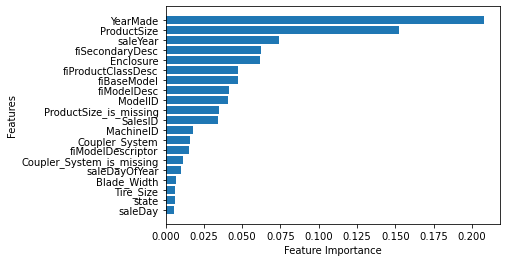

In [312]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Question to finish::** Why might knowing the feature importances of a trained machine learning model be helpful?

**Final Challenge:** What other machine learning models could you try on our dataset? Hint: Check out the scikit learn model map, or try to look something like CatBosst.ai or XGBoost.ai.